In [197]:
import numpy as np
import matplotlib.pyplot as plt

In [198]:
from qucat import Network,GUI,L,J,C,R

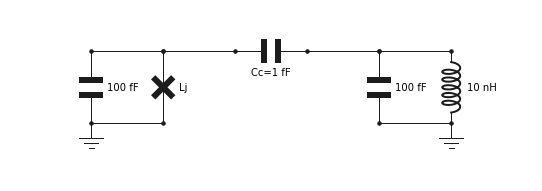

In [199]:
# Build circuit
case4 = GUI('circuits/case4.txt', # location of the circuit file
        edit=True, # open the GUI to edit the circuit
        plot=True, # plot the circuit after having edited it
        print_network=False) # print the network

In [200]:
# Compute hamiltonian (for h=1, so all energies are expressed in frequency units, not angular)
H = case4.hamiltonian(
    modes = [0,1],# Include modes 0 and 1
    taylor = 4,# Taylor the Josephson potential to the power 4
    excitations = [8,10],# Consider 8 excitations in mode 0, 10 for mode 1
    Lj = 8e-9)# set any component values that were not fixed when building the circuit

# QuTiP method which return the eigenergies of the system
ee = H.eigenenergies()

In [201]:
first_transition = ee[1]-ee[0] # in units of Hertz
# print this frequency in GHz units
print("%.3f GHz"%((first_transition)/1e9))

5.006 GHz


In [202]:
# H is the Hamiltonian
H,a_m_list = case4.hamiltonian(modes = [0,1],taylor = 4,excitations = [5,5], Lj = 8e-9,
    return_ops = True)  # with this, we return the annihilation operators of
                        # the different modes in addition to the Hamiltonian

# The Hamiltonian should be in angular frequencies for time-dependant simulations
H = 2.*np.pi*H

k = case4.loss_rates(Lj = 8e-9) # Calculate loss rates of the different modes

# c_ops are the collapse operators
# which should be in angular frequencies for time-dependant simulations
c_ops = [np.sqrt(2*np.pi*k[0])*a_m_list[0],np.sqrt(2*np.pi*k[0])*a_m_list[1]]

In [203]:
case4.eigenfrequencies(Lj=8e-9)

array([5.00696413e+09, 5.60042136e+09])

In [204]:
case4.anharmonicities(Lj=8e-9)

array([5.82662904e+02, 1.91131049e+08])

In [205]:
K = case4.kerr(Lj=8e-9)
print("%.2f kHz"%(K[0,1]/1e3))

667.43 kHz


In [206]:
A = case4.anharmonicities(Lj=8e-9)
print("%.2f kHz"%(2*np.sqrt(A[0]*A[1])/1e3))

667.43 kHz


In [207]:
case4.loss_rates(Lj=8e-9)

array([0., 0.])

In [208]:
T_1 = 1/case4.loss_rates(Lj=8e-9)/2/np.pi
print(T_1)

[inf inf]


C:\Users\nithi\AppData\Local\Temp\ipykernel_3316\3153739397.py:1: RuntimeWarning: divide by zero encountered in true_divide
  T_1 = 1/case4.loss_rates(Lj=8e-9)/2/np.pi


In [209]:
case4.f_k_A_chi(Lj = 8e-9)

(array([5.00696413e+09, 5.60042136e+09]),
 array([0., 0.]),
 array([5.82662904e+02, 1.91131049e+08]),
 array([[5.82662904e+02, 6.67427816e+05],
        [6.67427816e+05, 1.91131049e+08]]))

In [210]:
f,k,A,chi = case4.f_k_A_chi(pretty_print=True,Lj = 8e-9)

         mode |       freq.  |       diss.  |       anha.  |
            0 |     5.01 GHz |          0Hz |       583 Hz |
            1 |      5.6 GHz |          0Hz |      191 MHz |

Kerr coefficients (diagonal = Kerr, off-diagonal = cross-Kerr)
         mode |         0    |         1    |
            0 |       583 Hz |              |
            1 |      667 kHz |      191 MHz |



C:\Users\nithi\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
C:\Users\nithi\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


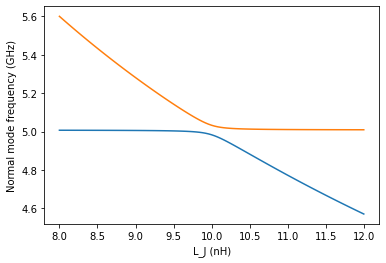

In [211]:
# array of values for the josephson inductance
Lj_list = np.linspace(8e-9,12e-9,101)

# Eigen-frequencies of the system:
freqs = case4.eigenfrequencies(Lj=Lj_list)

# plot first mode
plt.plot(Lj_list*1e9,freqs[0]/1e9)

# plot second mode
plt.plot(Lj_list*1e9,freqs[1]/1e9)

# Add labels
plt.xlabel('L_J (nH)')
plt.ylabel('Normal mode frequency (GHz)')

# show the figure
plt.show()

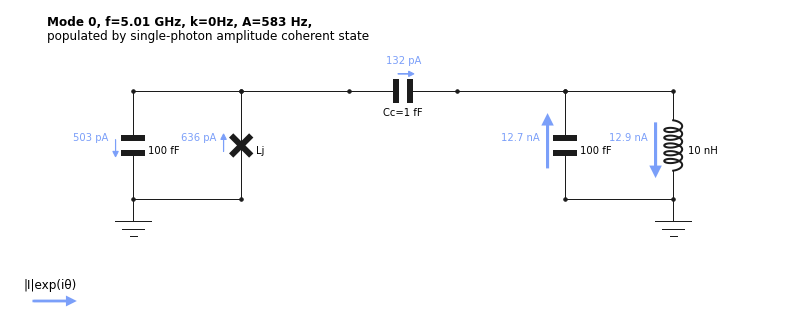

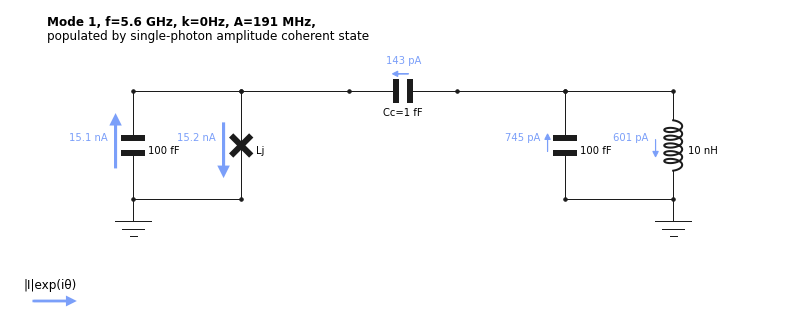

In [212]:
case4.show_normal_mode(mode=0,quantity='current', Lj = 8e-9)
case4.show_normal_mode(mode=1,quantity='current', Lj = 8e-9)


In [213]:
print(case4.components['Cc'].zpf(mode = 0, quantity = 'current',Lj = 8e-9))
print(case4.components['Cc'].zpf(mode = 1, quantity = 'current',Lj = 8e-9))

(-1.3237955039956282e-10+0j)
(1.4326492340120445e-10+0j)
